<a href="https://colab.research.google.com/github/Piyumanjalee/CampusNavigationHelper/blob/main/IntelliSense_implementation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

# 3. Define Dataset Paths
BASE_PATH = '/content/drive/MyDrive/IntelliSense/dataset'
TRAIN_PATH = os.path.join(BASE_PATH, 'train_data')
VAL_PATH = os.path.join(BASE_PATH, 'validate_data')
TEST_PATH = os.path.join(BASE_PATH, 'test_data')

# 4. Configuration
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# 5. Data Generators (Normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print("\n--- LOADING DATASETS ---")
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=True)

val_generator = test_datagen.flow_from_directory(
    VAL_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)



Mounted at /content/drive

--- LOADING DATASETS ---
Found 10501 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.



--- DISPLAYING DATASET SAMPLES ---


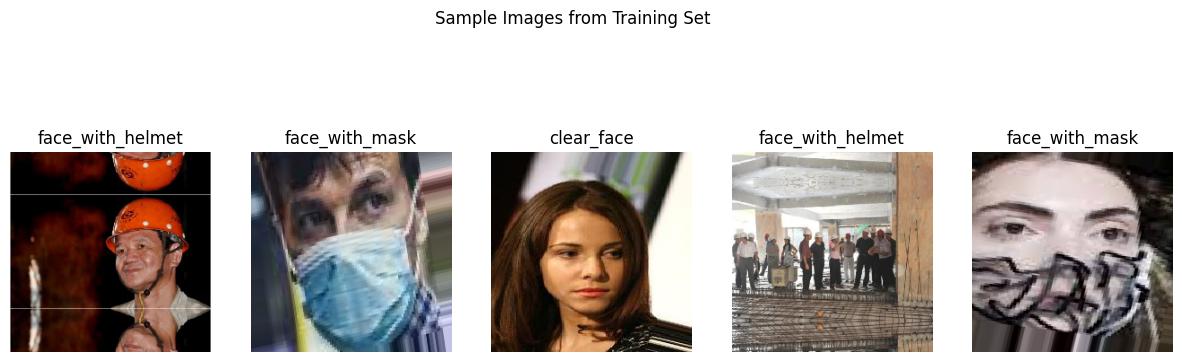

In [ ]:
# --- VISUALIZE SAMPLE IMAGES (Requirement: Display samples from each class) ---
def plot_sample_images(generator):
    images, labels = next(generator)
    class_dict = {v: k for k, v in generator.class_indices.items()}

    plt.figure(figsize=(15, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        label_index = np.argmax(labels[i])
        plt.title(class_dict[label_index])
        plt.axis('off')
    plt.suptitle("Sample Images from Training Set")
    plt.show()

print("\n--- DISPLAYING DATASET SAMPLES ---")
plot_sample_images(train_generator)

In [ ]:
# Define CNN Architecture
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Block 4 (Added for fine feature extraction)
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Classification Head
    layers.Flatten(),
    layers.Dense(64, activation='relu'), # Reduced to 64 to control overfitting
    layers.Dense(3, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\n--- MODEL SUMMARY ---")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- MODEL SUMMARY ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,359,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,747,971 (10.48 MB)

 Trainable params: 2,747,971 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("--- TRAINING STARTED ---")
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)
print("--- TRAINING COMPLETED ---")

--- TRAINING STARTED ---


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 6429s 20s/step - accuracy: 0.8297 - loss: 0.4139 - val_accuracy: 0.9267 - val_loss: 0.2771
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 107s 325ms/step - accuracy: 0.9687 - loss: 0.0825 - val_accuracy: 0.9353 - val_loss: 0.1795
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 106s 323ms/step - accuracy: 0.9880 - loss: 0.0370 - val_accuracy: 0.9087 - val_loss: 0.3626
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 104s 317ms/step - accuracy: 0.9886 - loss: 0.0343 - val_accuracy: 0.9447 - val_loss: 0.1911
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 106s 323ms/step - accuracy: 0.9940 - loss: 0.0179 - val_accuracy: 0.9320 - val_loss: 0.4200
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 106s 321ms/step - accuracy: 0.9946 - loss: 0.0160 - val_accuracy: 0.9600 - val_loss: 0.2377
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 105s 319ms/step - accuracy: 0.9924 - loss: 0.0210 - val_accuracy: 0.9380 - val_loss: 0.2308
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 106s 321ms/step - accuracy: 0.9959 - 

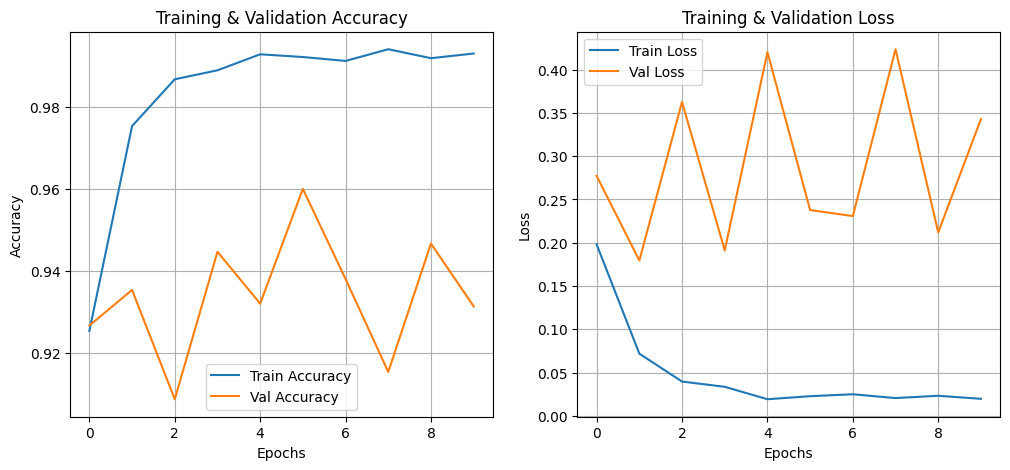

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

--- EVALUATING ON TEST SET ---
94/94 ━━━━━━━━━━━━━━━━━━━━ 1563s 17s/step - accuracy: 0.9845 - loss: 0.0526

Final Test Accuracy: 93.57%
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 247ms/step


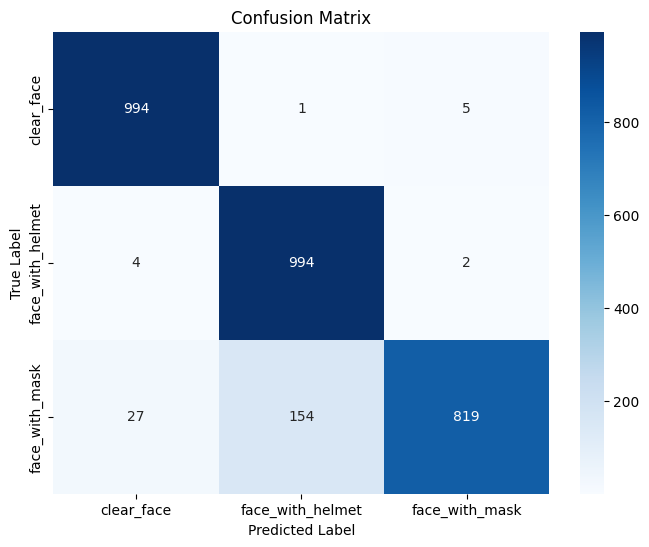


--- CLASSIFICATION REPORT ---
                  precision    recall  f1-score   support

      clear_face       0.97      0.99      0.98      1000
face_with_helmet       0.87      0.99      0.93      1000
  face_with_mask       0.99      0.82      0.90      1000

        accuracy                           0.94      3000
       macro avg       0.94      0.94      0.93      3000
    weighted avg       0.94      0.94      0.93      3000



In [ ]:
# 1. Evaluate on Test Set
print("--- EVALUATING ON TEST SET ---")
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")

# 2. Confusion Matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
class_names = list(test_generator.class_indices.keys())

cm = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 3. Classification Report
print('\n--- CLASSIFICATION REPORT ---')
print(classification_report(test_generator.classes, y_pred, target_names=class_names))

Found 3000 images belonging to 3 classes.

--- SAMPLE PREDICTIONS WITH CONFIDENCE ---


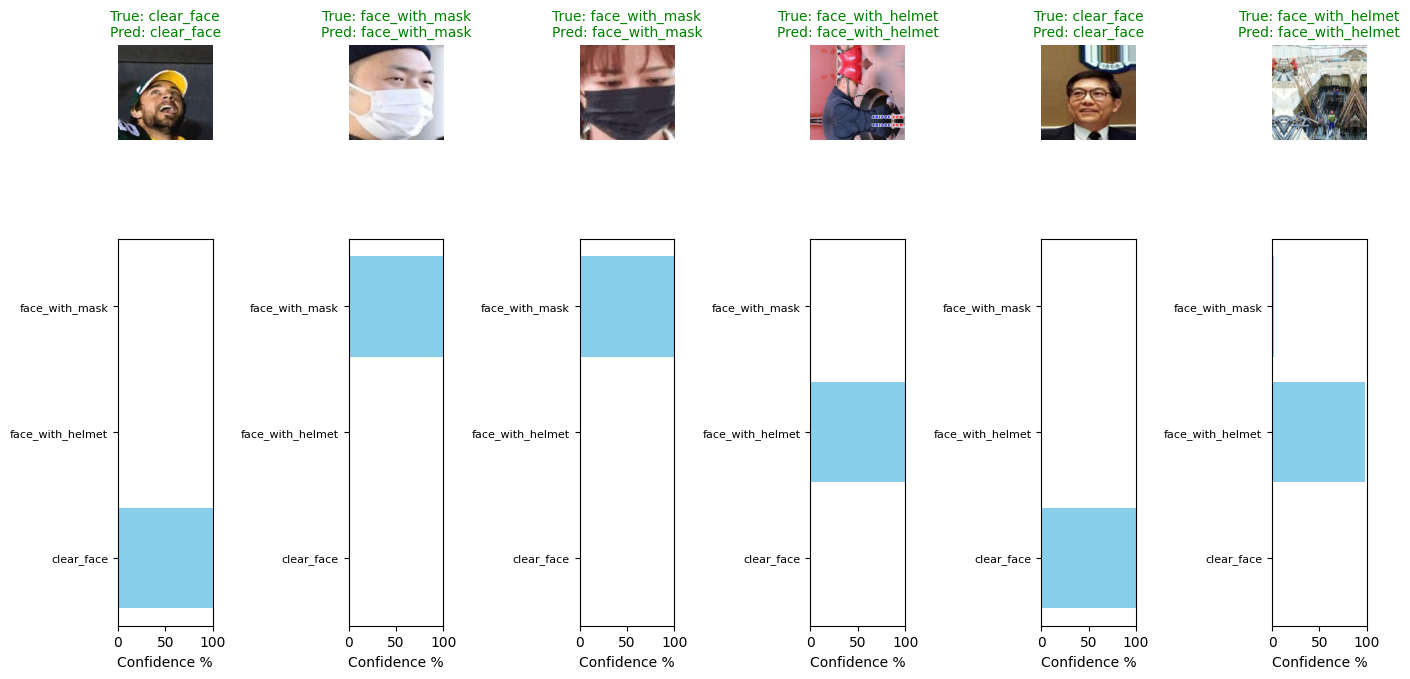

In [ ]:
# Create a temporary generator with shuffling to show random mix of classes
vis_datagen = ImageDataGenerator(rescale=1./255)
vis_generator = vis_datagen.flow_from_directory(
    TEST_PATH, target_size=IMG_SIZE, batch_size=32, class_mode='categorical', shuffle=True)

def plot_random_predictions_with_confidence(generator, model):
    images, labels = next(generator)
    class_dict = {v: k for k, v in generator.class_indices.items()}

    plt.figure(figsize=(14, 8))
    for i in range(6): # Show 6 random predictions
        # Make prediction
        img = images[i]
        img_input = np.expand_dims(img, axis=0)
        probs = model.predict(img_input, verbose=0)[0]

        true_label = class_dict[np.argmax(labels[i])]
        pred_label = class_dict[np.argmax(probs)]
        confidence = np.max(probs) * 100

        # Plot Image
        plt.subplot(2, 6, i + 1)
        plt.imshow(img)
        plt.axis('off')
        col = 'green' if true_label == pred_label else 'red'
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=col, fontsize=10)

        # Plot Confidence Bar
        plt.subplot(2, 6, i + 7)
        plt.barh(list(class_dict.values()), probs * 100, color='skyblue')
        plt.xlim(0, 100)
        plt.xlabel('Confidence %')
        plt.yticks(fontsize=8)

    plt.tight_layout()
    plt.show()

print("\n--- SAMPLE PREDICTIONS WITH CONFIDENCE ---")
plot_random_predictions_with_confidence(vis_generator, model)